In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


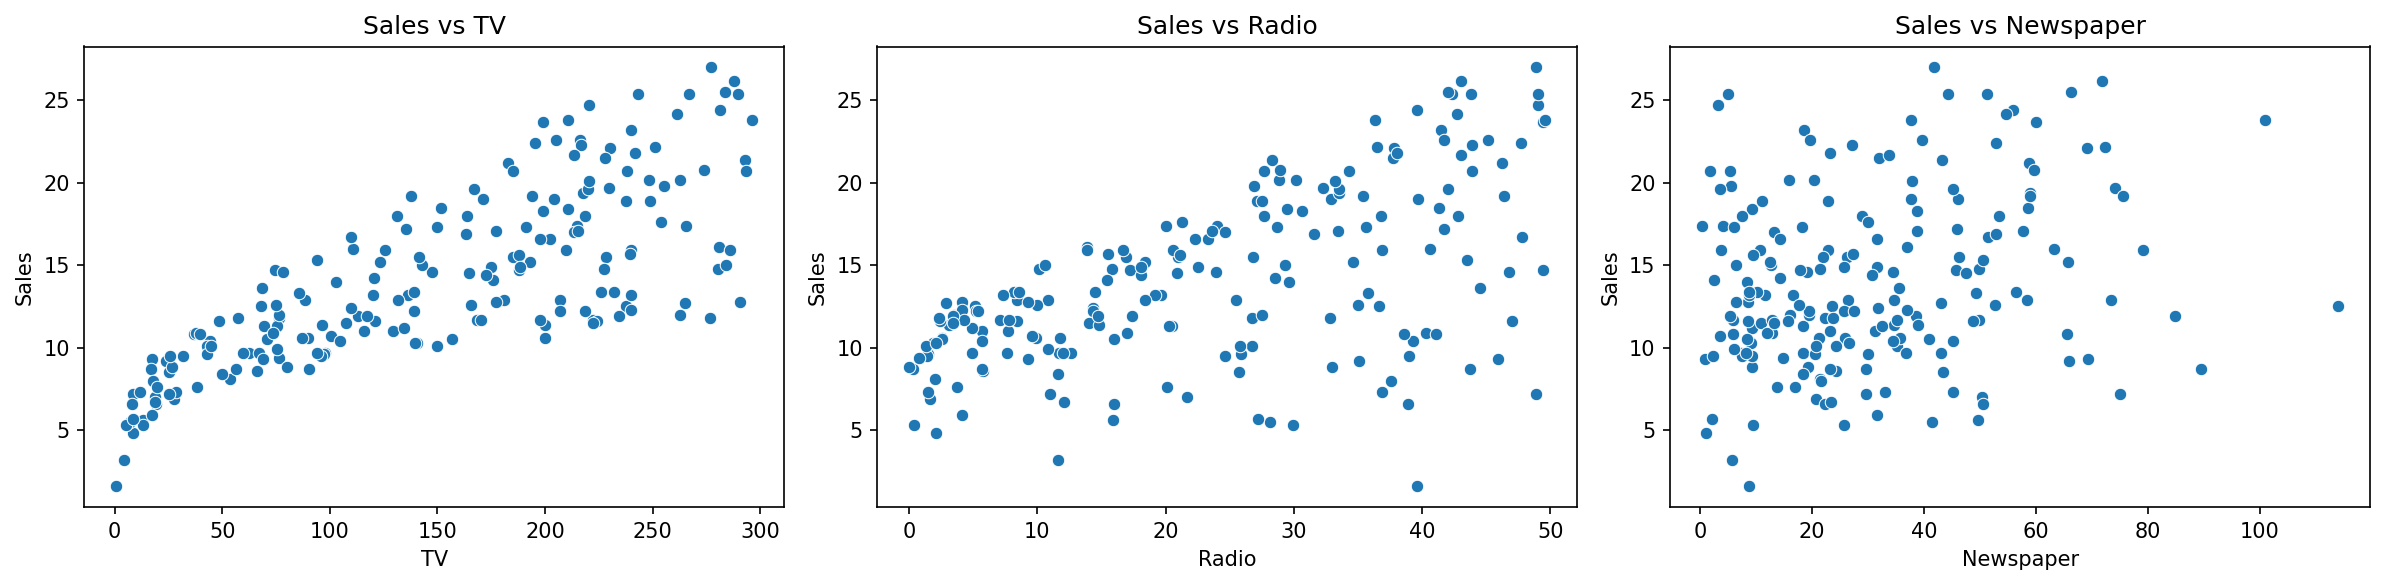

In [4]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(16, 4), dpi=150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(x=feature, y='Sales', data=df, ax=ax[i])
    ax[i].set_title(f"Sales vs {feature}")

fig.tight_layout()

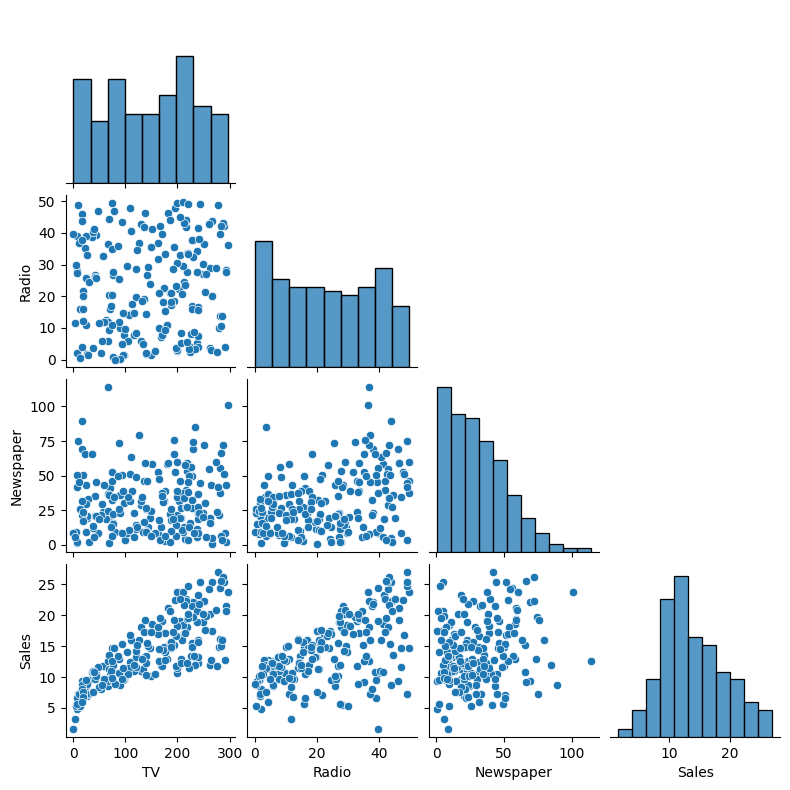

In [5]:
ax = sns.pairplot(df, corner=True, height=2)

intercept beta_0 hat: 7.032593549127696
slope beta_1 hat: 0.04753664043301972


Text(0.5, 1.0, 'Sales vs TV')

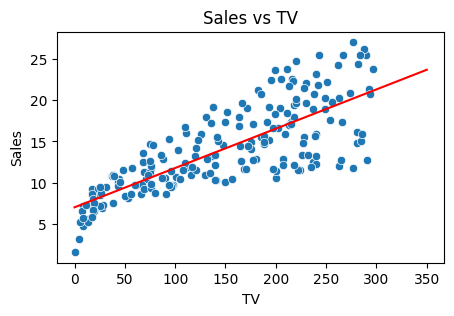

In [25]:
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)

# def y_hat(x):
#     return beta_1 + beta_0 * x

y_hat = lambda x: beta_0 + beta_1 * x

print(f"intercept beta_0 hat: {beta_0}")
print(f"slope beta_1 hat: {beta_1}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

ax = sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set_title("Sales vs TV")

<Axes: xlabel='TV', ylabel='Sales'>

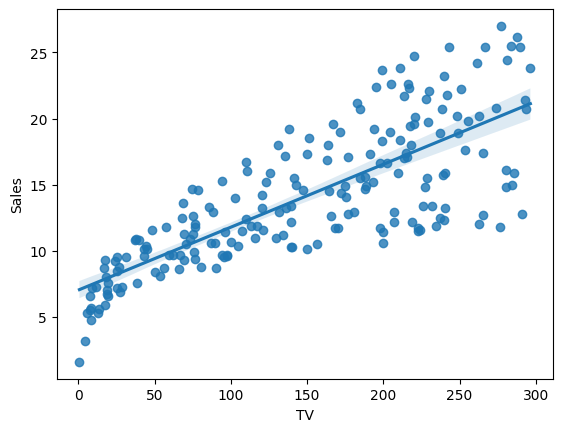

In [17]:
sns.regplot(data=df, x="TV", y="Sales")

In [24]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"Test sample: {test_sample}. Predicts {y_hat}")

Test sample: [1, 230.1, 37.8, 69.2]. Predicts 20.52397440971516


In [31]:
train_fraction = int(len(df) * 0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(140, 4)
(60, 4)
(140,)
(60,)


In [35]:
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coeficients beta: {beta_hat.values}")

predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.values, (4, 1)))

print(f"Shape of y_hat: {y_hat.shape}")

print()

Regression coeficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]
Shape of y_hat: (60, 1)



In [40]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_hat))
MSE = np.divide(1, m) * np.sum(np.square(y_test - y_hat))
RMSE = np.sqrt(MSE)

print(f"Mean Absolute Error: {MAE}, \nMean Squared Error: {MSE}, \nRoot Mean Squared Error: {RMSE}", sep="\n")

Mean Absolute Error: 1.3244490959726525, 
Mean Squared Error: 3.540425618238498, 
Root Mean Squared Error: 1.8816018755939041
